In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

In [2]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")
test.head()

,id,ingredients
0,10210,"[barbecue sauce, yellow onion, prepared pizza ..."
1,2310,"[olive oil, stewed tomatoes, hot sauce, chicke..."
2,33213,"[chopped bell pepper, cilantro leaves, white o..."
3,16902,"[tomatoes, purple onion, cumin seed, red lenti..."
4,9056,"[chile powder, lime, blackpepper, ground clove..."


In [3]:
# onehot encoder for ingredients
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
expandedLabelData_train = mlb.fit_transform(train["ingredients"])
labelClasses = mlb.classes_
expandedLabelData_test = mlb.fit_transform(test["ingredients"])
labelClasses_2 = mlb.classes_

expandedLabels_train = pd.DataFrame(expandedLabelData_train, columns=labelClasses)
expandedLabels_test = pd.DataFrame(expandedLabelData_test, columns=labelClasses_2)
print(expandedLabels_train)
print()
print(expandedLabels_test)

       (    oz.) tomato sauce  (   oz.) tomato paste  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   
...                       ...                    ...   
29769                       0                      0   
29770                       0                      0   
29771                       0                      0   
29772                       0                      0   
29773                       0                      0   

       (10 oz.) frozen chopped spinach  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
...                                ...   
29769                            

In [4]:
# shuffle data
from numpy import nan

def shuffle(df_origin): 
    df = df_origin.sample(frac=1,random_state=113)#,random_state=113
    df2= df.reset_index(drop=True)
    return df2

df = pd.DataFrame(train)
df = pd.concat([df,expandedLabels_train], axis = 1)
df_shuffle_train = shuffle(df)
print(df_shuffle_train)

df = pd.DataFrame(test)
df = pd.concat([df,expandedLabels_test], axis = 1)
df_shuffle_test = shuffle(df)
print(df_shuffle_test)

df_mix = pd.concat([df_shuffle_train, df_shuffle_test])
df_mix= df_mix.replace(nan, 0)
print(df_mix)


          id   cuisine                                        ingredients  \
0      45758   italian  [bread crumbs, ricotta cheese, fresh parsley, ...   
1       2065     greek  [large eggs, salt, dried oregano, plain yogurt...   
2        968    korean  [light brown sugar, dijon mustard, paprika, Go...   
3      30592   mexican  [shredded cheddar cheese, red bell pepper, gre...   
4      44223    indian  [jasmine rice, unsalted butter, grapeseed oil,...   
...      ...       ...                                                ...   
29769   3997    french  [cherries, all-purpose flour, sugar, refrigera...   
29770   4245  japanese  [avocado, crabmeat, sushi rice, nori, soy sauc...   
29771  36461   italian  [parmigiano reggiano cheese, crusty bread, par...   
29772  44094  japanese  [boneless chicken breast, salt, soy sauce, mus...   
29773  14160   italian  [tomato sauce, bacon, onions, butter, bow-tie ...   

       (    oz.) tomato sauce  (   oz.) tomato paste  \
0                  

In [5]:
#PCA for lower down dimensionality
from sklearn.decomposition import PCA
N_COMPONENTS = 2048
pca = PCA(N_COMPONENTS)
pca.fit(df_mix[df_mix.columns[3:]])
df_mix_pca = pd.DataFrame(pca.transform(df_mix[df_mix.columns[3:]]))
df_mix_pca.head()

print(df_mix_pca)

           0         1         2         3         4         5         6     \
0      0.510982  0.088518 -0.672753 -0.158376  0.414495  0.268091 -0.137284   
1      0.274644  0.375971 -0.176782  0.065640  0.075968 -0.475731  0.255792   
2     -0.307932  0.051774  0.877637 -0.059074  0.309773  0.580567 -0.154620   
3     -0.559968 -0.159165 -0.164936 -0.188891 -0.156836 -0.321363 -0.230882   
4     -0.312332 -0.461955  0.375438 -0.446578  0.049873 -0.273498  0.153156   
...         ...       ...       ...       ...       ...       ...       ...   
39769 -0.794928  0.016763  0.615479  0.982461  0.703543  0.028578  0.929613   
39770  0.417789  1.046598  0.052702  0.086276 -0.335018  0.499626 -0.514245   
39771  0.446145  0.307237 -0.438216  0.144716  0.617088  0.304539  0.038731   
39772 -0.515761 -0.015798  0.253565  0.321376 -0.101324  0.153866 -0.802781   
39773 -0.600770 -0.027741 -0.127006 -0.146289 -0.086928 -0.206495 -0.233840   

           7         8         9     ...      2038 

In [6]:
#transform cuisine
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_shuffle_train.cuisine)

df_shuffle_train.cuisine = le.transform(df_shuffle_train.cuisine)
print(df_shuffle_train.cuisine)
print(le.classes_)

0         9
1         6
2        12
3        13
4         7
         ..
29769     5
29770    11
29771     9
29772    11
29773     9
Name: cuisine, Length: 29774, dtype: int32
['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']


In [93]:
# train_test_split
from sklearn.model_selection import train_test_split
"""
df_shuffle_train_pca = df_mix_pca.iloc[:29774, :]
df_shuffle_test_pca = df_mix_pca.iloc[29774:39774, :]
print(df_shuffle_train_pca)
print(df_shuffle_test_pca)

train_x,test_x,train_y,test_y = train_test_split(df_shuffle_train_pca, df_shuffle_train.cuisine, random_state=42, test_size=0.30)
print(len(train_x))
print()
print(len(test_x))


df_shuffle_train_pca = df_mix.iloc[:29774, :].drop(['ingredients', 'id', 'cuisine'], axis=1)
df_shuffle_test_pca = df_mix.iloc[29774:39774, :].drop(['ingredients', 'id', 'cuisine'],axis=1)
print(df_shuffle_train_pca)
print(df_shuffle_test_pca)

train_x,test_x,train_y,test_y = train_test_split(df_shuffle_train_pca, df_shuffle_train.cuisine, random_state=42, test_size=0.30)
print(len(train_x))
print()
print(len(test_x))

           0         1         2         3         4         5         6     \
0      0.510982  0.088518 -0.672753 -0.158376  0.414495  0.268091 -0.137284   
1      0.274644  0.375971 -0.176782  0.065640  0.075968 -0.475731  0.255792   
2     -0.307932  0.051774  0.877637 -0.059074  0.309773  0.580567 -0.154620   
3     -0.559968 -0.159165 -0.164936 -0.188891 -0.156836 -0.321363 -0.230882   
4     -0.312332 -0.461955  0.375438 -0.446578  0.049873 -0.273498  0.153156   
...         ...       ...       ...       ...       ...       ...       ...   
29769 -0.665545  0.920214 -0.063421 -0.161680 -0.131944  0.567556  0.401429   
29770 -0.671867 -0.091928  0.172037 -0.045338  0.193025 -0.299653 -0.056879   
29771 -0.565840  0.085216 -0.128558 -0.272880 -0.135283 -0.122996 -0.250916   
29772  0.495289  0.003097  0.264597  0.721648 -0.450540 -0.299760  0.982927   
29773  0.664425  0.181223 -0.013030 -0.299707 -0.744751 -0.018418 -0.042312   

           7         8         9     ...      2038 

"\n\ndf_shuffle_train_pca = df_mix.iloc[:29774, :].drop(['ingredients', 'id', 'cuisine'], axis=1)\ndf_shuffle_test_pca = df_mix.iloc[29774:39774, :].drop(['ingredients', 'id', 'cuisine'],axis=1)\nprint(df_shuffle_train_pca)\nprint(df_shuffle_test_pca)\n\ntrain_x,test_x,train_y,test_y = train_test_split(df_shuffle_train_pca, df_shuffle_train.cuisine, random_state=42, test_size=0.30)\nprint(len(train_x))\nprint()\nprint(len(test_x))"

In [109]:
# validation--> SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
"""
for i in range(1, 10):
        svm_clf_rbf = SVC(random_state=42,kernel='rbf', C=1.5+0.1*i)
        svm_clf_rbf = svm_clf_rbf.fit(train_x,train_y)
        print(i, " accuracy: ", accuracy_score(test_y, svm_clf_rbf.predict(test_x)))
#svm_clf_sigmoid = SVC(random_state=42,kernel='sigmoid', C=2)

#svm_clf_lin = svm_clf_lin.fit(train_x,train_y)
print('1')
#svm_clf_rbf = svm_clf_rbf.fit(train_x,train_y)
print('3')
#svm_clf_sigmoid = svm_clf_sigmoid.fit(train_x,train_y)

svm_clf_rbf = SVC(random_state=42,kernel='rbf', C=2)
svm_clf_rbf = svm_clf_rbf.fit(df_mix.iloc[:29774, :].drop(['ingredients', 'id', 'cuisine'], axis=1),df_shuffle_train.cuisine)

"""
svm_clf_rbf = SVC(random_state=42,kernel='rbf', C=2.1)
svm_clf_rbf = svm_clf_rbf.fit(df_shuffle_train_pca,df_shuffle_train.cuisine)

In [95]:
pred = []
pred.append(svm_clf_lin.predict(test_x))
print('1')
pred.append(svm_clf_rbf.predict(test_x))
print('3')
pred.append(svm_clf_sigmoid.predict(test_x))

1
3


0
recall:  0.7436471510130975
precision:  0.7063418328053412
accuracy:  0.7436471510130975

1
recall:  0.7514832643009067
precision:  0.7598107474295703
accuracy:  0.7514832643009067

2
recall:  0.7351393708720475
precision:  0.717309284893014
accuracy:  0.7351393708720475



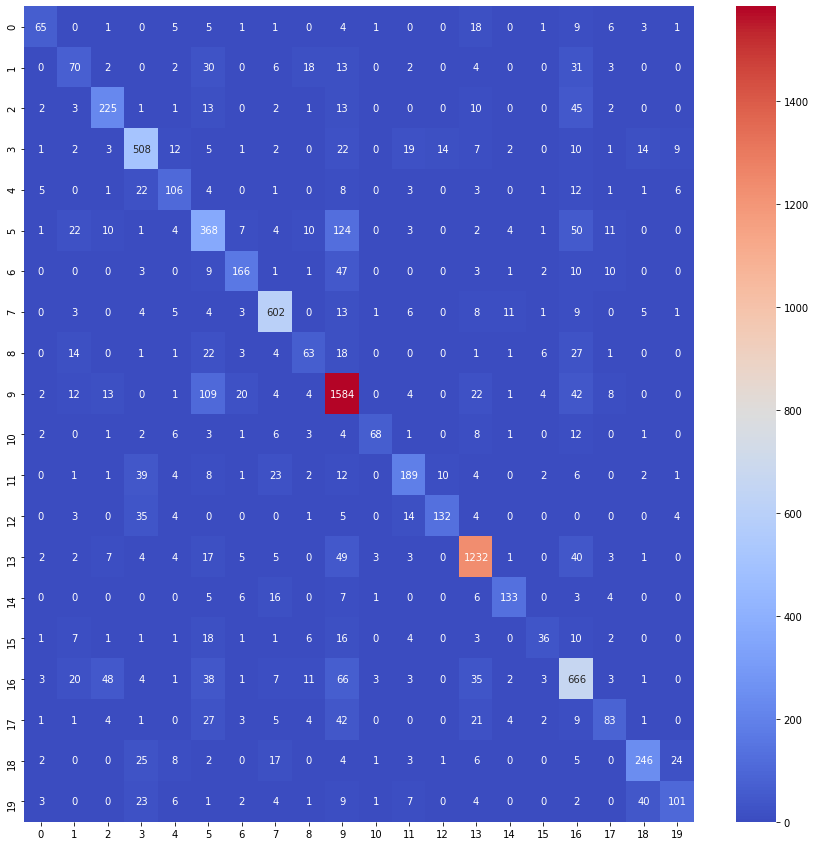

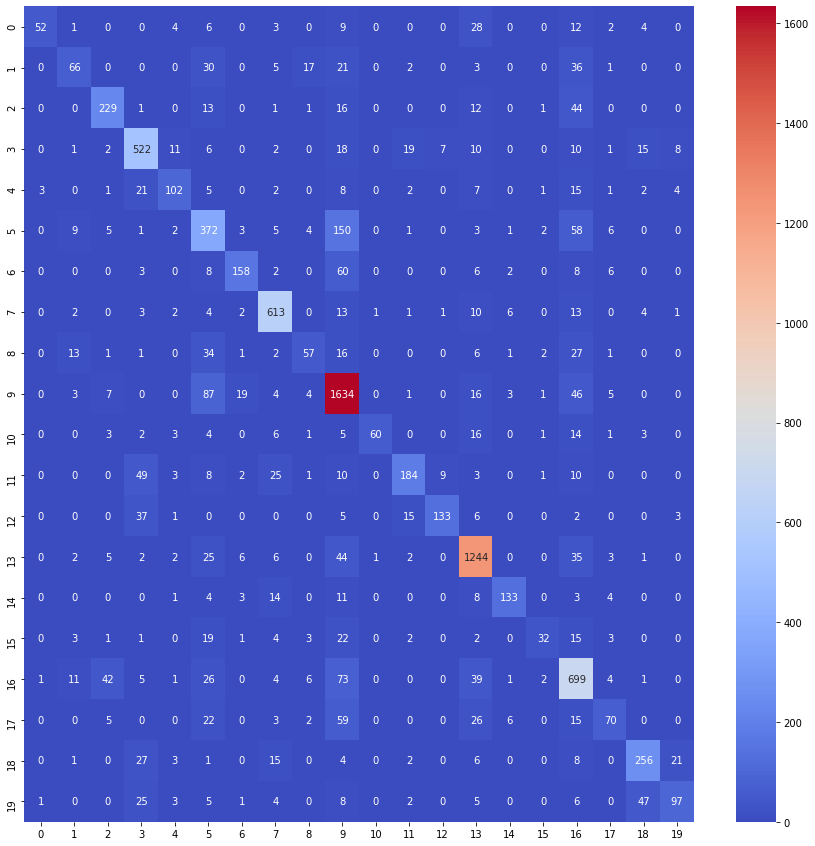

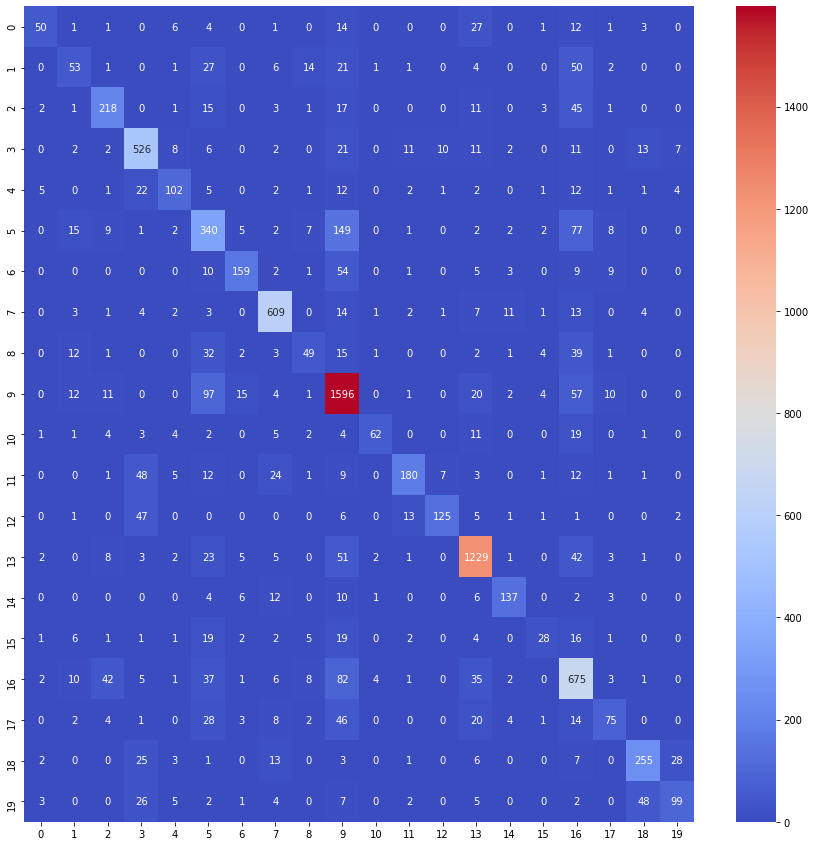

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

for i in range(len(pred)):
    print(i)
    fig, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(confusion_matrix(test_y, pred[i]),annot=True,cmap='coolwarm',fmt='d')
    print("recall: ", recall_score(test_y, pred[i], average='micro'))
    print("precision: ", precision_score(test_y, pred[i], average='macro'))
    print("accuracy: ", accuracy_score(test_y, pred[i]))
    print()
    plt.savefig(str(i))
    

In [112]:
sub = svm_clf_rbf.predict(df_shuffle_test_pca)

In [113]:
submit = le.inverse_transform(pd.Series(sub))
submit = pd.concat([pd.Series(df_shuffle_test.id, name='Id'), pd.Series(submit, name='Category')], axis=1)
print(submit.to_csv(index=False))
submit.to_csv("submission.csv", index = False)


Id,Category
9356,italian
31575,southern_us
3603,british
5099,southern_us
13393,mexican
33105,vietnamese
18363,italian
10466,southern_us
25480,italian
4444,southern_us
11715,mexican
5766,moroccan
39856,filipino
6548,southern_us
23756,french
7334,southern_us
42644,chinese
47978,mexican
10103,cajun_creole
30801,mexican
6729,irish
42628,mexican
20048,cajun_creole
8633,italian
20666,mexican
30385,indian
27628,italian
24392,southern_us
37299,mexican
31384,japanese
35328,southern_us
40134,filipino
3808,mexican
10098,southern_us
31743,southern_us
30460,russian
13492,chinese
10293,chinese
48993,mexican
26671,italian
13373,southern_us
18795,italian
17332,italian
42217,jamaican
18034,southern_us
39009,chinese
44699,cajun_creole
11109,italian
614,mexican
2930,southern_us
35566,italian
13585,thai
1528,mexican
15593,thai
32751,mexican
40295,chinese
478,cajun_creole
23240,mexican
10355,french
31805,indian
5047,southern_us
27299,french
28988,mexican
48956,southern_us
15679,mexican
32291,mexican
34061,

In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

train_x = train_x.astype("float32")
train_y = train_y.astype("float32")
test_x = test_x.astype("float32")
test_y = test_y.astype("float32")
d = df_shuffle_train_pca.astype("float32")
de = df_shuffle_train.cuisine.astype("float32")

# Reserve 8933 samples for validation
val_x = train_x[-8933:]
val_y = train_y[-8933:]
train_x = train_x[:-8933]
train_y = train_y[:-8933]
val_d = d[-10000:]
val_de = de[-10000:]
d = d[:-10000]
de = de[:-10000]



In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from sklearn.metrics import accuracy_score
from talos.utils import lr_normalizer
model = Sequential()                
model.add(Dense(720,
                input_shape=(2048,),
                activation='relu'))
model.add(Dense(256,
                activation='relu'))
model.add(Dense(20, activation='hard_sigmoid'))
model.compile(
    optimizer=tf.keras.optimizers.Nadam(lr=lr_normalizer(0.01, tf.keras.optimizers.Nadam)),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model.fit(
    d.values, de.values,
    batch_size=2,
    epochs=60,
    verbose=0,
    validation_data=(val_d, val_de)
)
"""            
y = model.predict(test_x.values)
pred = []
for j in range(len(y)):
    pred.append(np.argmax(y[j]))

print("recall: ", recall_score(test_y, pred, average='micro'))
print("precision: ", precision_score(test_y, pred, average='macro'))
print("accuracy: ", accuracy_score(test_y, pred))
ax = sns.heatmap(confusion_matrix(test_y, pred),annot=True,cmap='coolwarm',fmt='d')
print()
plt.savefig('EMG.jpg') 
"""


'            \ny = model.predict(test_x.values)\npred = []\nfor j in range(len(y)):\n    pred.append(np.argmax(y[j]))\n\nprint("recall: ", recall_score(test_y, pred, average=\'micro\'))\nprint("precision: ", precision_score(test_y, pred, average=\'macro\'))\nprint("accuracy: ", accuracy_score(test_y, pred))\nax = sns.heatmap(confusion_matrix(test_y, pred),annot=True,cmap=\'coolwarm\',fmt=\'d\')\nprint()\nplt.savefig(\'EMG.jpg\') \n'

In [141]:
q = df_shuffle_test_pca.astype("float32")
y = model.predict(q)
pred = []
for j in range(len(y)):
    pred.append(np.argmax(y[j]))

print(pred)


[9, 16, 1, 0, 13, 18, 9, 2, 9, 16, 13, 14, 4, 2, 5, 16, 3, 10, 17, 13, 8, 13, 2, 9, 13, 1, 9, 5, 17, 11, 16, 18, 13, 16, 16, 15, 19, 3, 13, 9, 16, 9, 0, 7, 16, 3, 15, 9, 13, 16, 9, 18, 13, 18, 13, 3, 2, 13, 5, 7, 9, 17, 13, 16, 13, 16, 13, 15, 3, 3, 16, 10, 1, 9, 18, 13, 9, 0, 9, 7, 16, 11, 16, 1, 6, 6, 10, 9, 13, 13, 18, 6, 13, 7, 13, 12, 7, 9, 0, 1, 13, 7, 9, 17, 13, 11, 16, 13, 0, 12, 13, 17, 8, 13, 9, 12, 13, 16, 16, 16, 3, 18, 5, 9, 9, 6, 9, 9, 7, 2, 7, 9, 13, 7, 13, 10, 13, 13, 9, 13, 0, 0, 14, 13, 0, 14, 9, 9, 0, 2, 15, 14, 5, 3, 3, 14, 11, 9, 9, 0, 12, 13, 16, 9, 9, 3, 11, 15, 18, 3, 8, 3, 7, 16, 3, 13, 6, 3, 9, 7, 0, 16, 14, 12, 16, 9, 9, 9, 12, 3, 9, 13, 16, 9, 13, 13, 18, 2, 2, 3, 5, 9, 13, 9, 7, 9, 15, 16, 13, 16, 6, 16, 9, 11, 16, 13, 3, 9, 8, 9, 13, 13, 9, 2, 3, 18, 3, 13, 18, 3, 16, 13, 9, 9, 15, 12, 18, 0, 9, 17, 9, 5, 13, 9, 9, 9, 9, 11, 9, 17, 9, 2, 1, 16, 9, 16, 9, 3, 17, 16, 9, 5, 18, 9, 6, 16, 16, 1, 9, 16, 13, 5, 2, 9, 5, 16, 9, 13, 7, 3, 13, 3, 9, 8, 3, 5, 9, 18,

In [142]:
submit_nn = le.inverse_transform(pd.Series(pred))
submit_nn = pd.concat([pd.Series(df_shuffle_test.id, name='Id'), pd.Series(submit_nn, name='Category')], axis=1)
print(submit_nn)
submit_nn.to_csv("submission_nn.csv", index = False)

         Id     Category
0      9356      italian
1     31575  southern_us
2      3603      british
3      5099    brazilian
4     13393      mexican
...     ...          ...
9995  24775      chinese
9996   7449  southern_us
9997  19211      mexican
9998   8966  southern_us
9999  29738         thai

[10000 rows x 2 columns]


In [116]:
# use talos for hyperparameters optimization
import talos
from talos.utils import lr_normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Nadam, Adadelta, Adam
from tensorflow.keras.activations import softmax, hard_sigmoid, sigmoid
from tensorflow.keras.losses import categorical_crossentropy, logcosh
import tensorflow as tf

In [148]:


def cuisine_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(Dense(params['first_neuron'],
                    input_shape=(2048,),
                    activation='relu'))
    model.add(Dense(512,
                    activation='relu'))
    model.add(Dense(20, activation=params['last_activation']))
  
    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

    out = model.fit(x_train, y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0,
                    validation_data=(x_val, y_val)   )
    
    return out, model

In [149]:
# parameter tester
p = {'lr': [0.01],
     'first_neuron':[1024],
     'epochs': [40],
     'batch_size': [32],
     'optimizer': [Nadam, Adam],    
     'loss': ['categorical_crossentropy'],
     'last_activation': ['hard_sigmoid'],
     'weight_regulizer': [None]}

In [150]:
# scan
scan_object = talos.Scan(train_x.values,
                         train_y.values, 
                         params=p,
                         model=cuisine_model,
                         experiment_name='cuisine')



100%|██████████| 2/2 [11:34<00:00, 347.36s/it]


In [146]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)

In [147]:
# access the dataframe with the results
analyze_object.data

,start,end,duration,round_epochs,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,batch_size,epochs,first_neuron,last_activation,loss,lr,optimizer,weight_regulizer
0,12/27/20-160646,12/27/20-161450,483.589554,40,2.188656,0.865987,2.328472,0.725161,32,40,1024,hard_sigmoid,categorical_crossentropy,0.01,<class 'tensorflow.python.keras.optimizer_v2.n...,None
1,12/27/20-161454,12/27/20-161807,193.675066,40,2.315567,0.731854,2.381654,0.664987,32,40,1024,hard_sigmoid,categorical_crossentropy,0.01,<class 'tensorflow.python.keras.optimizer_v2.a...,None


In [108]:
# get the highest result for any metric
analyze_object.high('val_sparse_categorical_accuracy')

0.7169358730316162

In [ ]:
def train_evaluate(ga_individual_solution):   
    # Decode GA solution to integer for window_size and num_units
    window_size_bits = BitArray(ga_individual_solution[0:6])
    num_units_bits = BitArray(ga_individual_solution[6:]) 
    window_size = window_size_bits.uint
    num_units = num_units_bits.uint
    print('\nWindow Size: ', window_size, ', Num of Units: ', num_units)
    
    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_units == 0:
        return 100, 
     
    # Train LSTM model and predict on validation set
    inputs = Input(shape=(window_size,1))
    x = LSTM(num_units, input_shape=(window_size,1))(inputs)
    predictions = Dense(1, activation='linear')(x)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(train_x, train_y, epochs=5, batch_size=10,shuffle=True)
    y_pred = model.predict(test_x)
    
    # Calculate the RMSE score as fitness score for GA
    rmse = accuracy_score(test_y, y_pred)
    print('Validation accuracy: ', rmse,'\n')
    
    return rmse

In [ ]:
# Define Hyperparameters for NN
HIDDEN_LAYER_COUNT = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
HIDDEN_LAYER_NEURONS = [8, 16, 24, 32, 64, 128, 256, 512]
HIDDEN_LAYER_RATE = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
HIDDEN_LAYER_ACTIVATIONS = ['tanh', 'relu', 'sigmoid', 'linear', 'softmax']
HIDDEN_LAYER_TYPE = ['dense', 'dropout']
MODEL_OPTIMIZER = ['adam', 'rmsprop']
 
# Define Generic Algorithm Parameters
MAX_GENERATIONS = 50  # Max Number of Generations to Apply the Generic Algorithm
POPULATION_SIZE = 20  # Max Number of Individuals in Each Population
BEST_CANDIDATES_COUNT = 4  # Number of Best Candidates to Use
RANDOM_CANDIDATES_COUNT = 2  # Number of Random Candidates (From Entire Population of Generation) to Next Population
OPTIMIZER_MUTATION_PROBABILITY = 0.1  # 10% of Probability to Apply Mutation on Optimizer Parameter
HIDDEN_LAYER_MUTATION_PROBABILITY = 0.1  # 10% of Probability to Apply Mutation on Hidden Layer Quantity

In [ ]:
class LayerLayout:
    def __init__(self, layer_type):
        self.neurons = None
        self.activation = None
        self.rate = None
        self.layer_type = layer_type
 
class Chromosome:
    def __init__(self, layer_layout, optimizer, specie):
        self.layer_layout = layer_layout
        self.optimizer = optimizer
        self.result_worst = None
        self.result_best = None
        self.result_avg = None
        self.result_sum = None
        self.specie = specie
        self.ml_model = None
 
    def safe_get_hidden_layer_node(self, index=0):
        if len(self.layer_layout) > index:
            return self.layer_layout[index]
        return None

In [ ]:
def generate_model_from_chromosome(df, chromosome):
    # Define Neural Network Topology
    m_model = Sequential()
    # Define Input Layer
    m_model.add(InputLayer(input_shape=(2048,)))

    # Add Hidden Layers
    for layer in chromosome.layer_layout:

        if layer.layer_type == 'dense':
            m_model.add(
                Dense(
                    layer.neurons,
                    activation=layer.activation
                )
            )
        elif layer.layer_type == 'dropout':
            m_model.add(
                Dropout(rate=layer.rate)
            )

    # Define Output Layer
    m_model.add(Dense(2, activation='sigmoid'))

    # Compile Neural Network
    m_model.compile(optimizer=chromosome.optimizer, loss='categorical_crossentropy')

    # Fit Model with Data
    m_model.fit(
        train_x,
        train_y,
        epochs=20,
        verbose=0
    )

    # Update Model into Chromosome
    chromosome.ml_model = m_model

In [ ]:
def create_random_layer():

    layer_layout = LayerLayout(
        layer_type=HIDDEN_LAYER_TYPE[random.randint(0, len(HIDDEN_LAYER_TYPE) - 1)]
    )

    if layer_layout.layer_type == 'dense':
        layer_layout.neurons = HIDDEN_LAYER_NEURONS[random.randint(0, len(HIDDEN_LAYER_NEURONS) - 1)]
        layer_layout.activation = HIDDEN_LAYER_ACTIVATIONS[random.randint(0, len(HIDDEN_LAYER_ACTIVATIONS) - 1)]

    elif layer_layout.layer_type == 'dropout':
        layer_layout.rate = HIDDEN_LAYER_RATE[random.randint(0, len(HIDDEN_LAYER_RATE) - 1)]

    return layer_layout

In [ ]:
def generate_first_population_randomly(population_size=10):
    """
    Creates an Initial Random Population
    :param population_size:
    :return:
    """

    print("[+] Creating Initial NN Model Population Randomly: ", end='')

    result = []
    run_start = time.time()

    for current in range(population_size):

        # Choose Hidden Layer Count
        hidden_layer_count = HIDDEN_LAYER_COUNT[random.randint(0, len(HIDDEN_LAYER_COUNT)-1)]
        hidden_layer_layout = []

        # Define Layer Structure
        for current_layer in range(hidden_layer_count):
            hidden_layer_layout.append(create_random_layer())

        chromosome = Chromosome(
            layer_layout=hidden_layer_layout,
            optimizer=MODEL_OPTIMIZER[random.randint(0, len(MODEL_OPTIMIZER)-1)],
            specie=f"I {current}"
        )

        result.append(chromosome)

    run_stop = time.time()
    print(f"Done > Takes {run_stop-run_start} sec")

    return result

In [ ]:
def generate_children(mother: Chromosome, father: Chromosome) -> Chromosome:
    """
    Generate a New Children based Mother and Father Genomes
    :param mother: Mother Chromosome
    :param father: Father Chromosome
    :return: A new Children
    """

    # Layer Layout
    c_layer_layout = []
    layers_counts = len(mother.layer_layout) if random.randint(0, 1) == 0 else len(father.layer_layout)
    for ix in range(layers_counts):
        c_layer_layout.append(
            mother.safe_get_hidden_layer_node(ix) if random.randint(0, 1) == 0 else father.safe_get_hidden_layer_node(ix)
        )

    # Remove all Nones on Layers Layout
    c_layer_layout = [item for item in c_layer_layout if item is not None]

    # Optimizer
    c_optimizer = mother.optimizer if random.randint(0, 1) == 0 else father.optimizer

    chromosome = Chromosome(
        layer_layout=c_layer_layout,
        optimizer=c_optimizer,
        specie=""
    )

    return chromosome

In [ ]:
def mutate_chromosome(chromosome):
    """
    Apply Random Mutations on Chromosome
    :param chromosome: input Chromosome
    :return: Result Chromosome. May or May Not Contains a Mutation
    """

    # Apply Mutation on Optimizer
    if random.random() <= OPTIMIZER_MUTATION_PROBABILITY:
        chromosome.optimizer = MODEL_OPTIMIZER[random.randint(0, len(MODEL_OPTIMIZER)-1)]

    # Apply Mutation on Hidden Layer Size
    if random.random() <= HIDDEN_LAYER_MUTATION_PROBABILITY:

        new_hl_size = HIDDEN_LAYER_COUNT[random.randint(0, len(HIDDEN_LAYER_COUNT)-1)]

        # Check if Need to Expand or Reduce Layer Count
        if new_hl_size > len(chromosome.layer_layout):

            # Increase Layer Count
            while len(chromosome.layer_layout) < new_hl_size:
                chromosome.layer_layout.append(
                    create_random_layer()
                )

        elif new_hl_size < len(chromosome.layer_layout):

            # Reduce Layers Count
            chromosome.layer_layout = chromosome.layer_layout[0: new_hl_size]

        else:
            pass  # Do not Change Layer Size

    return chromosome

In [ ]:
def play_game(ml_model, games=100, model_name="Reference Model"):
    """
    Play te Game
    :param ml_model:
    :param games:
    :return:
    """

    all_rewards = []

    for i_episode in range(games):

        # Define Reward Var
        episode_reward = 0

        # Reset Env for the Game
        observation = env.reset()

        while True:
            # env.render()  << Uncomment to allow the Open.AI Engine do Render the Game

            # Predict Next Movement
            current_action_pred = ml_model.predict(observation.reshape(1, 4))

            # Define Movement
            current_action = np.argmax(current_action_pred)

            # Make Movement
            observation, reward, done, info = env.step(current_action)

            if done:
                episode_reward += 1
                break

            episode_reward += 1

        all_rewards.append(episode_reward)

    # Return Worst, Avg, Best and Sum of Rewards
    r_worst = np.min(all_rewards)
    r_best = np.max(all_rewards)
    r_avg = np.average(all_rewards)
    r_sum = np.sum(all_rewards)

    return r_worst, r_best, r_avg, r_sum

In [ ]:
def evolve_population(population):
    """
    Evolve and Create the Next Generation of Individuals
    :param population: Current Population
    :return: A new population
    """

    # Clear Graphs from Keras e TensorFlow
    K.clear_session()
    tf.reset_default_graph()

    # Select N Best Candidates + Y Random Candidates. Kill the Rest of Chromosomes
    parents = []
    parents.extend(population[0:BEST_CANDIDATES_COUNT])  # N Best Candidates
    for rn in range(RANDOM_CANDIDATES_COUNT):
        parents.append(population[random.randint(0, POPULATION_SIZE - 1)])  # Y Random Candidate

    # Create New Population Through Crossover
    new_population = []
    new_population.extend(parents)

    # Fill Population with new Random Children with Mutation
    while len(new_population) < POPULATION_SIZE:
        parent_a = random.randint(0, len(parents) - 1)
        parent_b = random.randint(0, len(parents) - 1)
        while parent_a == parent_b:
            parent_b = random.randint(0, len(parents) - 1)

        new_population.append(
            mutate_chromosome(
                generate_children(
                    mother=parents[parent_a],
                    father=parents[parent_b]
                )
            )
        )

    return new_population

In [ ]:
population = generate_first_population_randomly(
        population_size=POPULATION_SIZE
)

    # Run Each Generation
for current_generation in range(MAX_GENERATIONS):
    print(f"[+] Generation {current_generation+1} of {MAX_GENERATIONS}")
    i = 0

        # >>>>>> Training Phase <<<<<<
    print(f"\tTraining Models: ", end='', flush=True)
    training_start = time.time()

        # Train all Models in Population
    for individual in population:
        generate_model_from_chromosome(df, individual)

    training_stop = time.time()
    print(f"Done > Takes {training_stop - training_start} sec")

        # >>>>>> Evaluation Phase <<<<<<
    print(f"\tEvaluating Population: ", end='', flush=True)
    evaluation_start = time.time()

    for individual in population:

            # Play the Games
        score_worst, score_best, score_avg, score_sum = play_game(
            ml_model=individual.ml_model,
            games=100,
            model_name=individual.specie
        )

            # Update Chromosome Results
        individual.result_worst = score_worst
        individual.result_best = score_best
        individual.result_avg = score_avg
        individual.result_sum = score_sum

            # Update Indexer
        i += 1

    evaluation_stop = time.time()
    print(f"Done > Takes {evaluation_stop - evaluation_start} sec")

        # Sort Candidates by Sum of Results
    population.sort(key=lambda x: x.result_sum, reverse=True)

        # Compute Generation Metrics
    gen_score_avg = np.average([item.result_avg for item in population])
    gen_score_min = np.min([item.result_worst for item in population])
    gen_score_max = np.max([item.result_best for item in population])
    gen_score_sum = np.sum([item.result_sum for item in population])

    print(f"\tWorst Score:{gen_score_min} | Average Score:{gen_score_avg} | Best Score:{gen_score_max} | Total Score:{gen_score_sum}")

        # >>>>>> Genetic Selection, Children Creation and Mutation <<<<<<
    population = evolve_population(population)
